### Download the dataset

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
  
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

--2021-05-21 03:53:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.240, 172.217.8.16, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   147MB/s    in 1.0s    

2021-05-21 03:53:07 (147 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-05-21 03:53:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 172.217.12.240, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (

### Load the dataset with augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Define the model

In [4]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3),activation='relu',input_shape=(300, 300, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

### Training the model

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch = 8, # 1027//128
      epochs = 100,
      verbose = 1,
      validation_data = validation_generator,
      validation_steps = 8) # 256//32

Epoch 1/100
8/8 [==============================] - 53s 2s/step - loss: 0.6944 - accuracy: 0.5130 - val_loss: 0.6701 - val_accuracy: 0.5742
Epoch 2/100
8/8 [==============================] - 21s 3s/step - loss: 0.6747 - accuracy: 0.6270 - val_loss: 0.7864 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 21s 3s/step - loss: 0.7181 - accuracy: 0.5986 - val_loss: 0.5954 - val_accuracy: 0.6562
Epoch 4/100
8/8 [==============================] - 21s 3s/step - loss: 0.6748 - accuracy: 0.6204 - val_loss: 0.5688 - val_accuracy: 0.7109
Epoch 5/100
8/8 [==============================] - 21s 3s/step - loss: 0.6220 - accuracy: 0.7022 - val_loss: 0.5853 - val_accuracy: 0.6406
Epoch 6/100
8/8 [==============================] - 21s 3s/step - loss: 0.5927 - accuracy: 0.7399 - val_loss: 0.5661 - val_accuracy: 0.6719
Epoch 7/100
8/8 [==============================] - 21s 3s/step - loss: 0.5614 - accuracy: 0.7566 - val_loss: 0.4903 - val_accuracy: 0.7930
Epoch 8/100
8/8 [==========

### Plot the history of the model

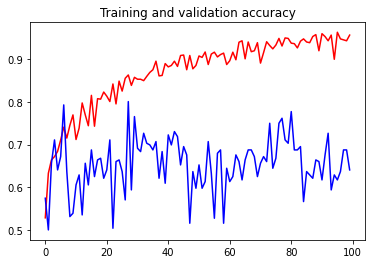

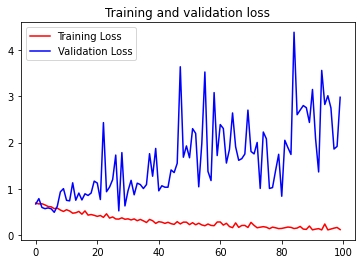

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Visualizing the effect of the convolution

In [24]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
def visualize_effect(net, image_url):
    successive_outputs = [layer.output for layer in net.layers[1:]]
    visualization_model = tf.keras.models.Model(inputs = net.input, outputs = successive_outputs)
    img = load_img(image_url, target_size = (300, 300))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255
    successive_feature_maps = visualization_model.predict(x)
    layer_names = [layer.name for layer in net.layers]
    
    for layer_name, feature_map in zip(layer_names, successive_feature_maps):
        if(len(feature_map.shape) == 4): # only do before flattening
            n_features = feature_map.shape[-1]
            size = feature_map.shape[1]
            display_grid = np.zeros((size, size*n_features))
            for i in range(n_features):
                x = feature_map[0,:,:,i]
                x -= x.mean()
                x /= x.std()
                x*= 64
                x += 128
                x = np.clip(x, 0, 255).astype('uint8')
                display_grid[:,i*size:(i+1)*size] = x
            scale = 20./n_features
            plt.figure(figsize=(scale*n_features,scale))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap = 'viridis');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


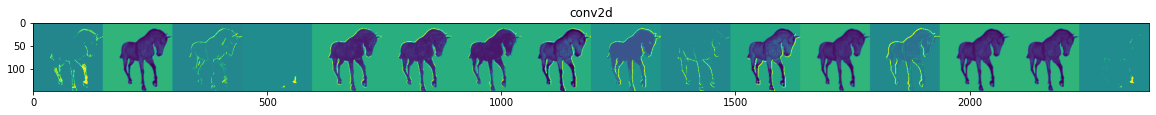

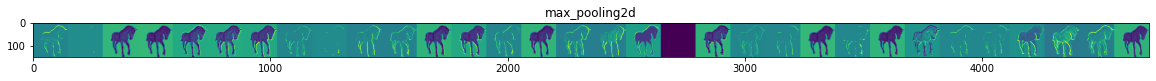

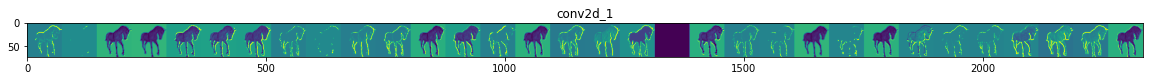

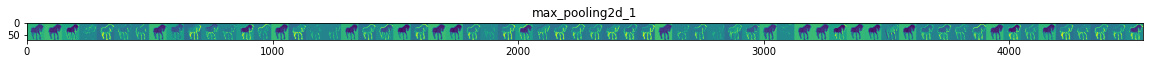

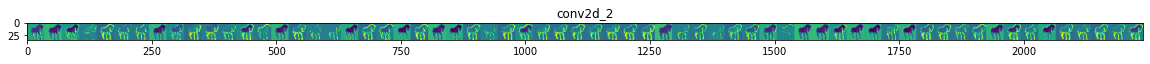

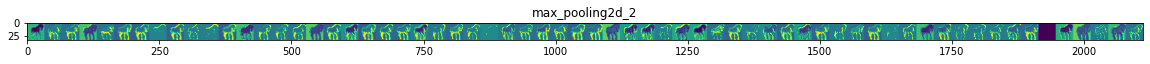

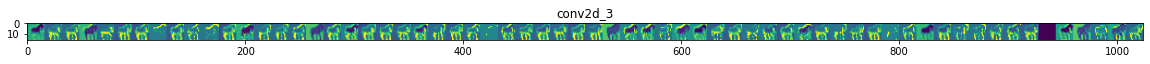

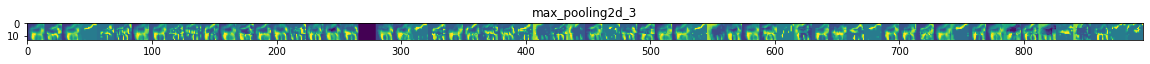

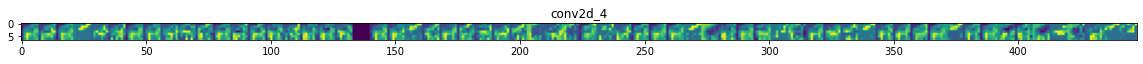

In [ ]:
visualize_effect(model, os.path.join(validation_horse_dir,'horse1-000.png'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


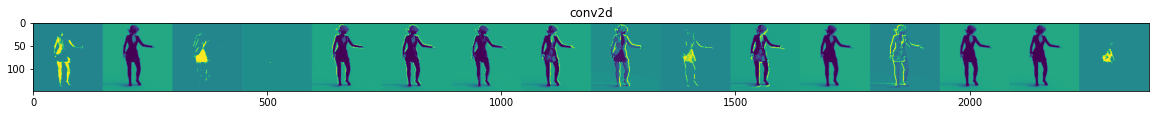

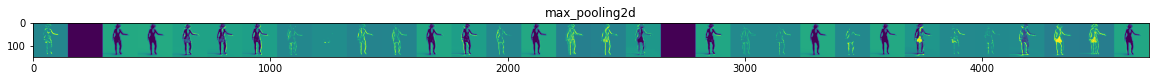

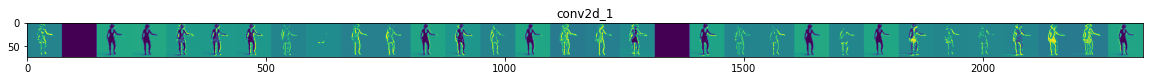

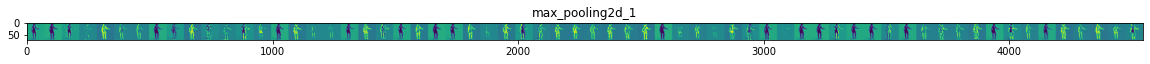

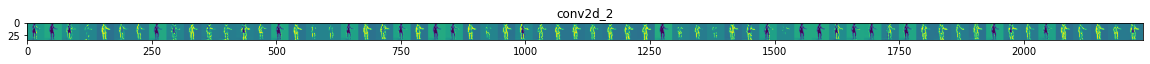

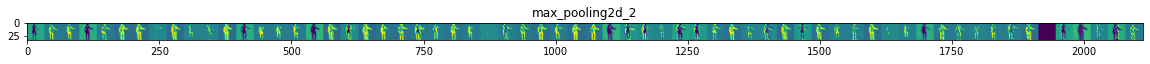

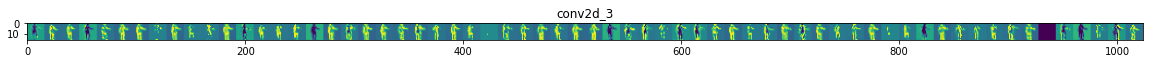

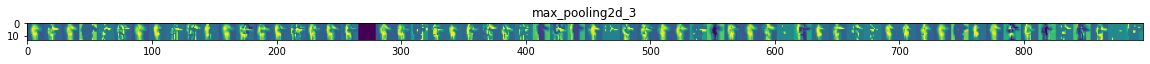

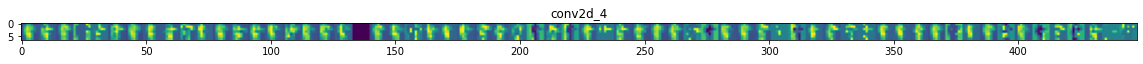

In [ ]:
visualize_effect(model, os.path.join(validation_human_dir,'valhuman02-19.png'))

### Saving the model

In [ ]:
model.save('horse_or_human.h5')

### Using predefined models (Transfer Learning)

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False,
                                weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False
  
print(pre_trained_model.summary())

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
______________________

In [9]:
from tensorflow.keras.optimizers import SGD

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)
model = Model( pre_trained_model.input, x)
model.compile(optimizer = SGD(lr=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch = 8, # 1027//128
      epochs = 10,
      verbose = 1,
      validation_data = validation_generator,
      validation_steps = 8) # 256//32

Epoch 1/10
8/8 [==============================] - 27s 3s/step - loss: 1.3469 - accuracy: 0.5512 - val_loss: 0.5339 - val_accuracy: 0.6836
Epoch 2/10
8/8 [==============================] - 23s 3s/step - loss: 0.5287 - accuracy: 0.9110 - val_loss: 0.3366 - val_accuracy: 0.9102
Epoch 3/10
8/8 [==============================] - 23s 3s/step - loss: 0.3908 - accuracy: 0.9131 - val_loss: 0.2860 - val_accuracy: 0.9922
Epoch 4/10
8/8 [==============================] - 23s 3s/step - loss: 0.4139 - accuracy: 0.7458 - val_loss: 0.4110 - val_accuracy: 0.7930
Epoch 5/10
8/8 [==============================] - 23s 3s/step - loss: 0.1751 - accuracy: 0.9707 - val_loss: 0.3410 - val_accuracy: 0.8555
Epoch 6/10
8/8 [==============================] - 23s 3s/step - loss: 0.1385 - accuracy: 0.9771 - val_loss: 0.4348 - val_accuracy: 0.8047
Epoch 7/10
8/8 [==============================] - 25s 3s/step - loss: 0.1004 - accuracy: 0.9861 - val_loss: 0.1522 - val_accuracy: 0.9219
Epoch 8/10
8/8 [==================

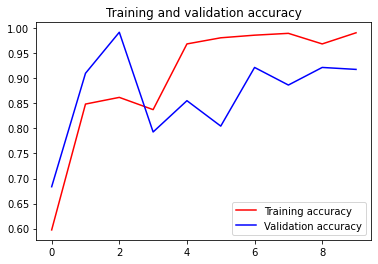

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure();

plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


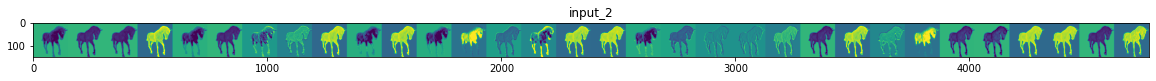

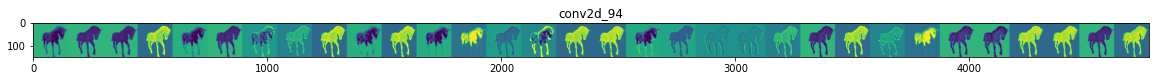

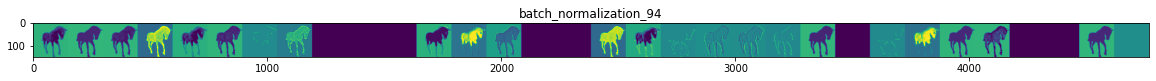

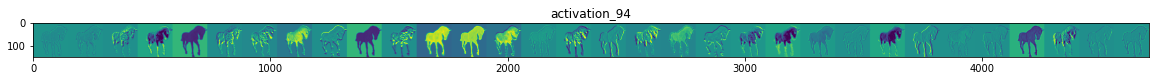

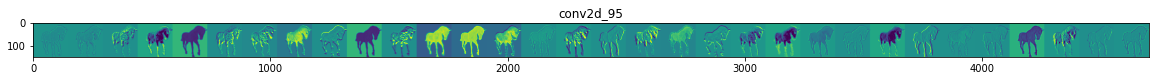

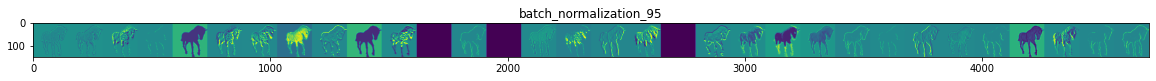

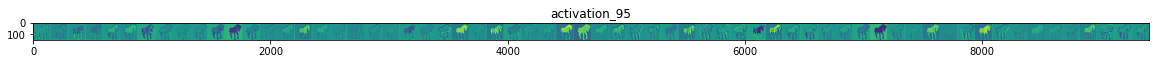

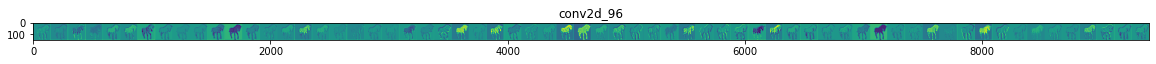

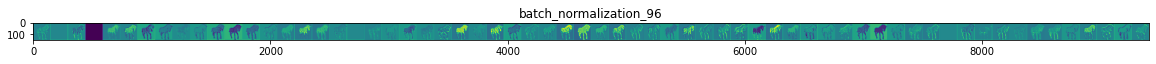

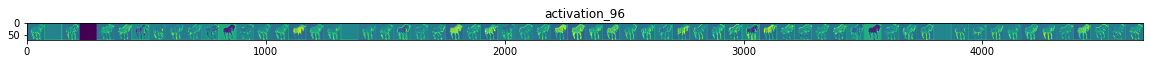

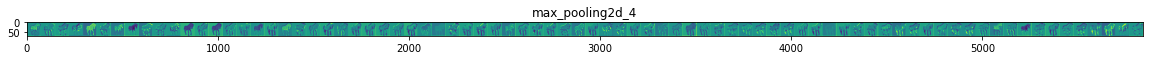

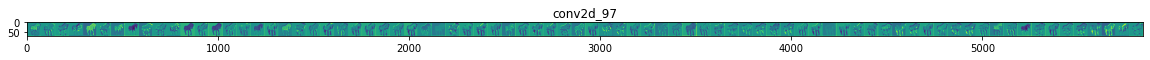

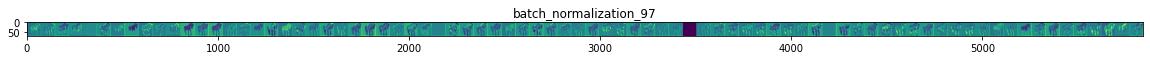

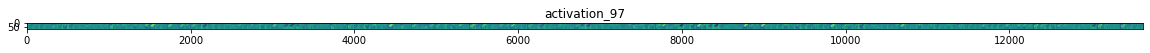

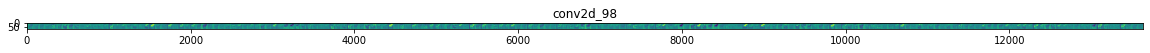

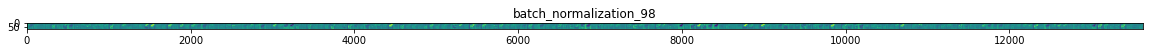

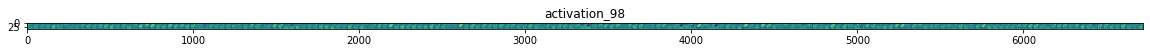

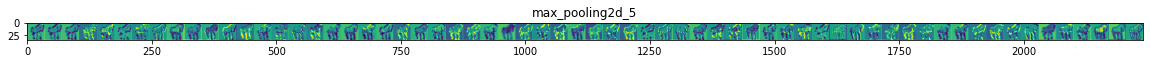

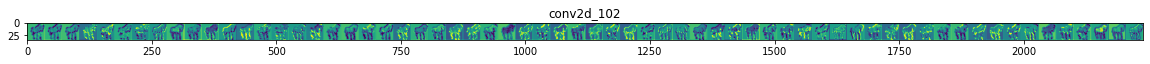

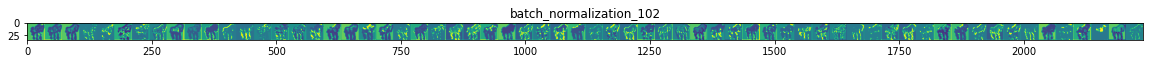

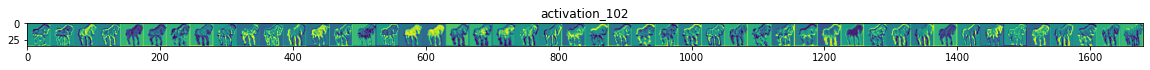

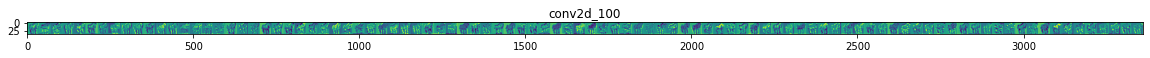

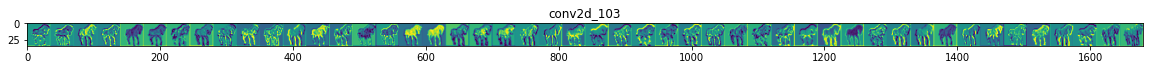

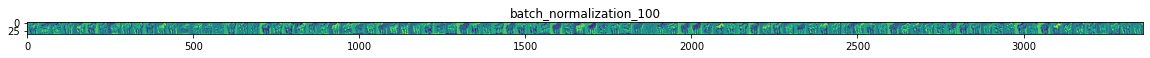

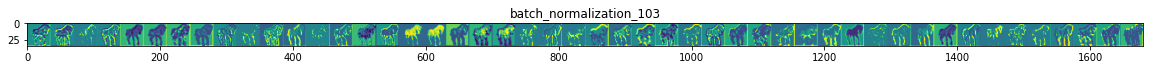

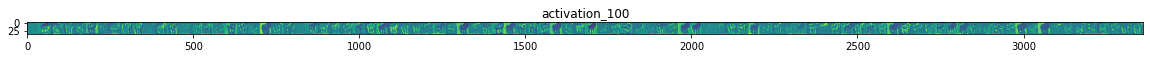

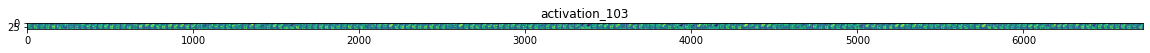

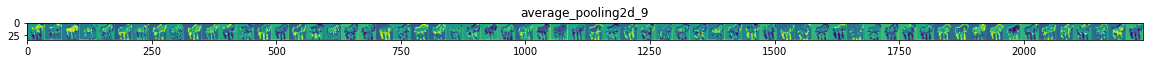

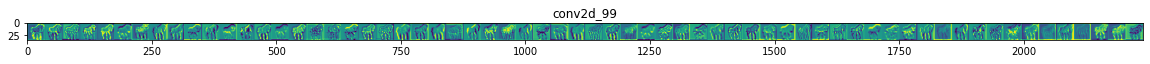

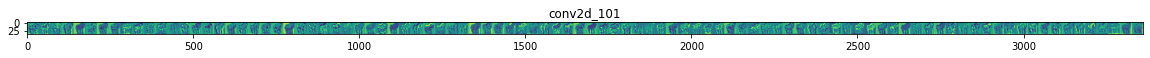

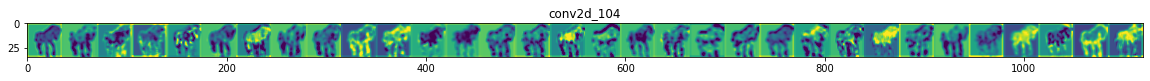

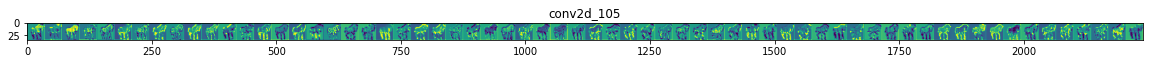

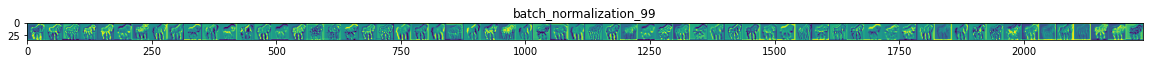

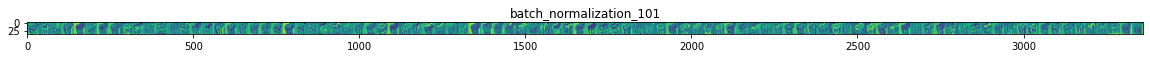

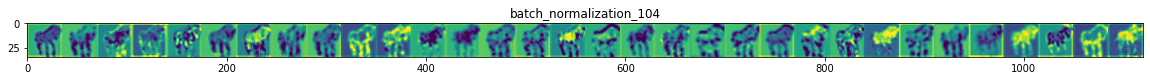

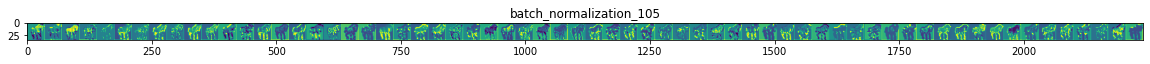

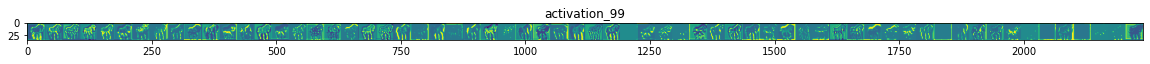

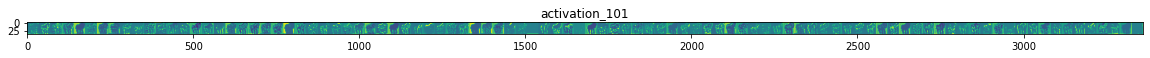

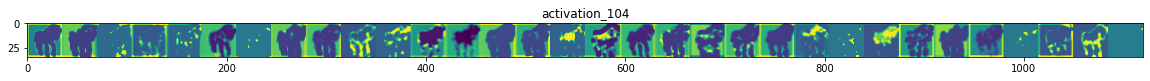

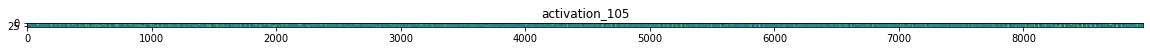

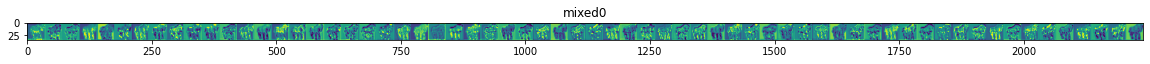

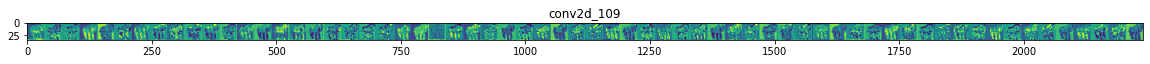

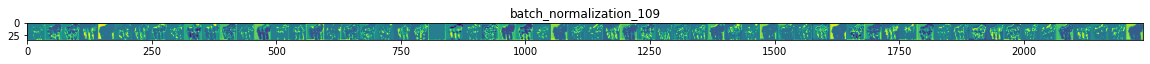

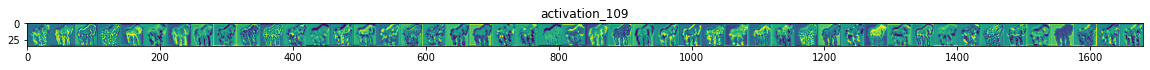

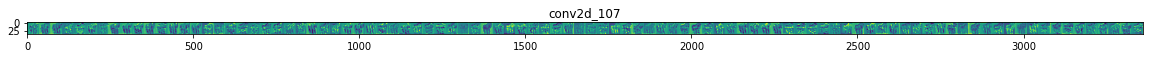

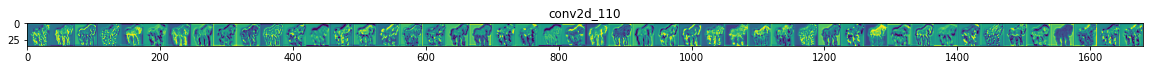

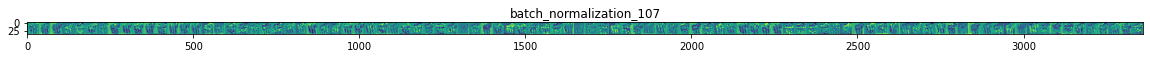

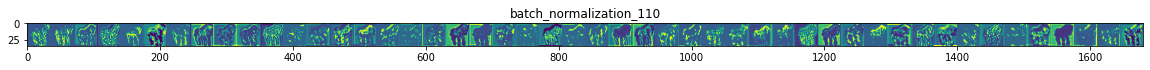

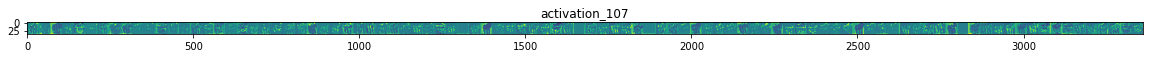

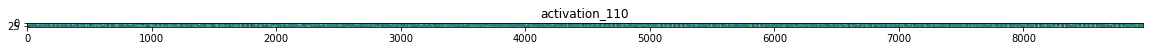

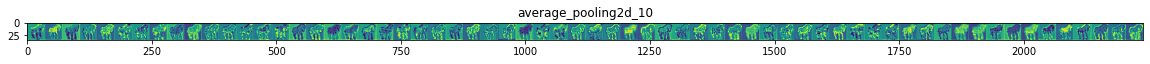

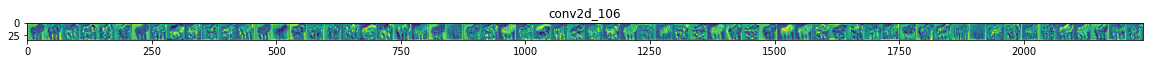

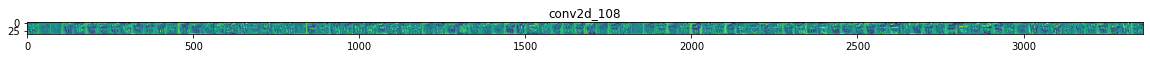

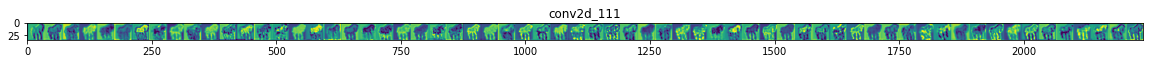

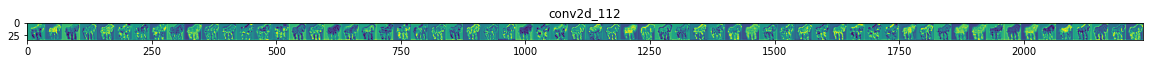

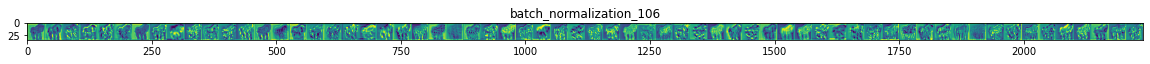

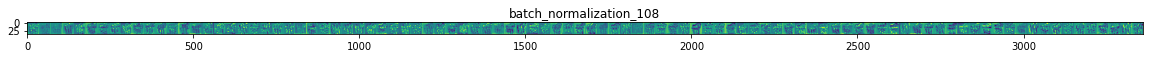

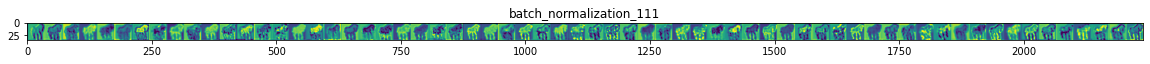

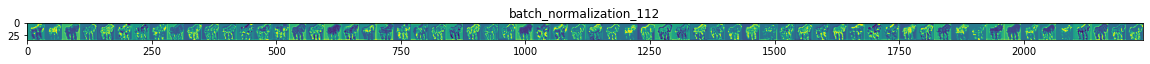

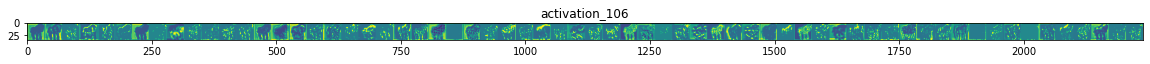

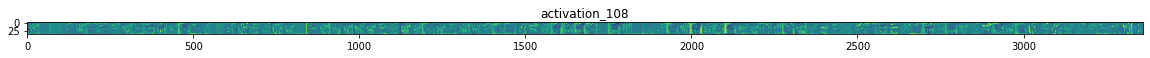

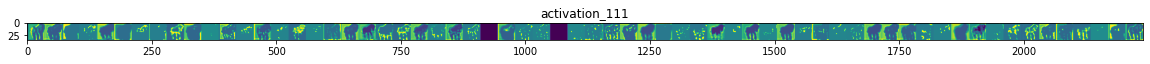

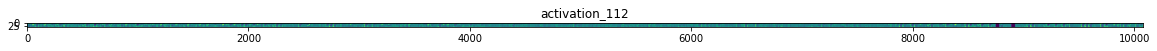

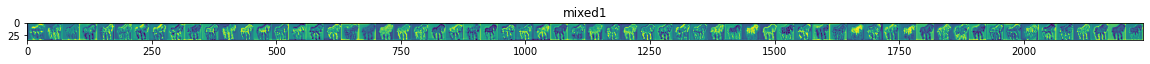

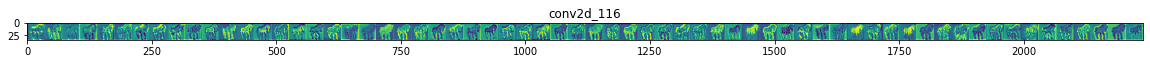

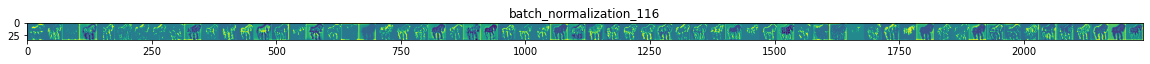

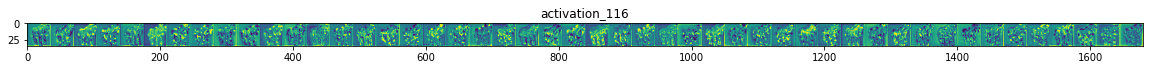

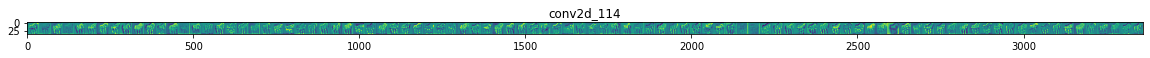

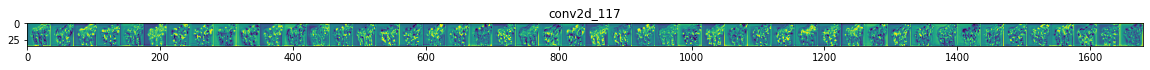

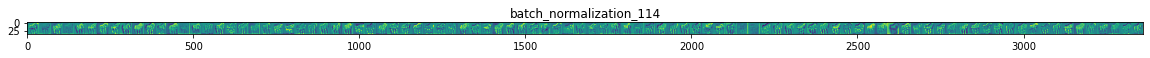

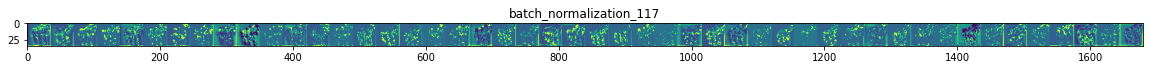

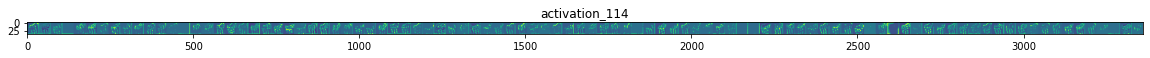

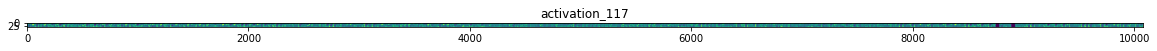

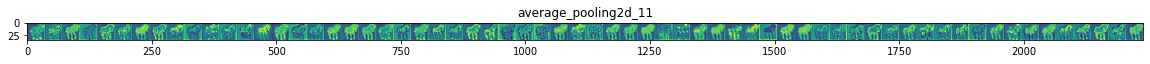

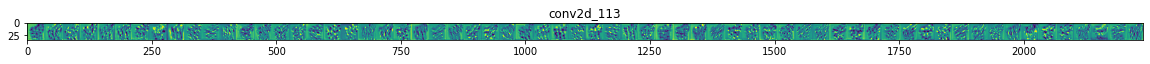

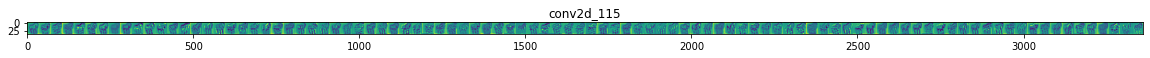

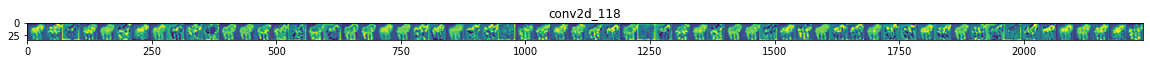

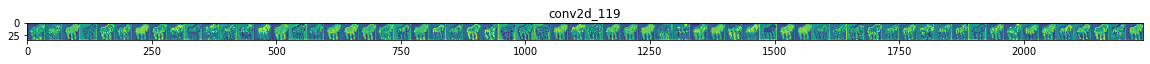

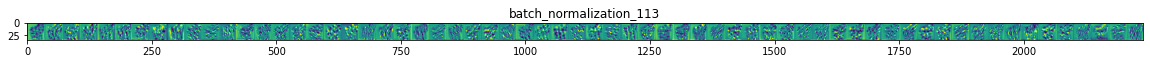

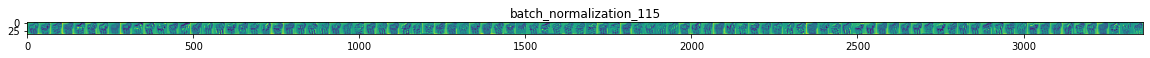

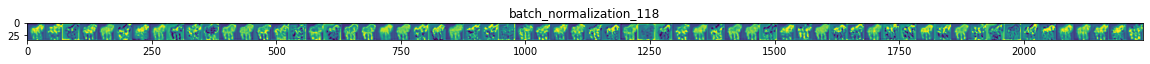

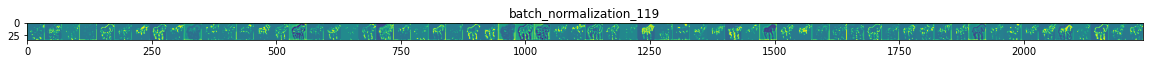

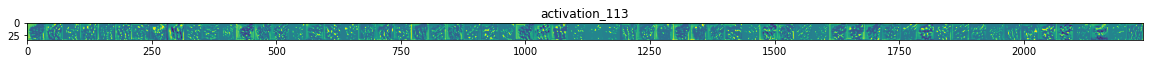

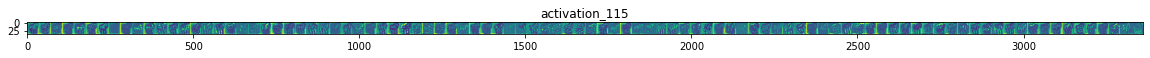

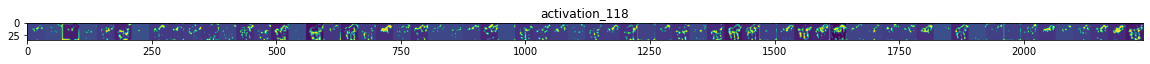

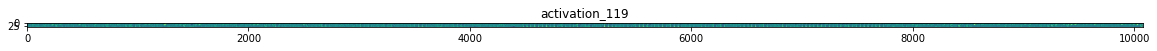

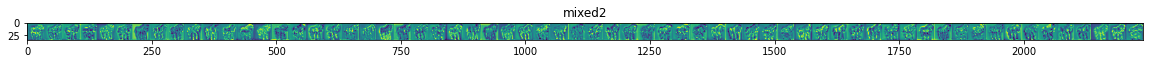

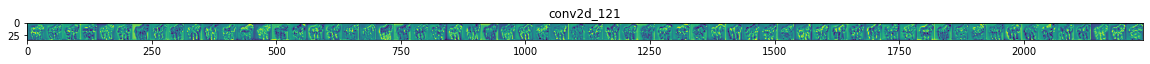

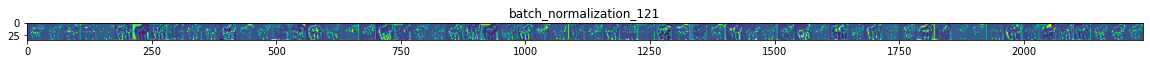

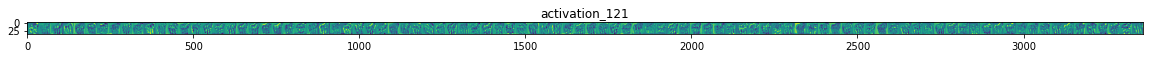

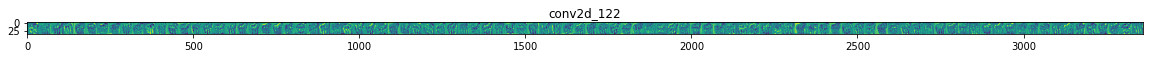

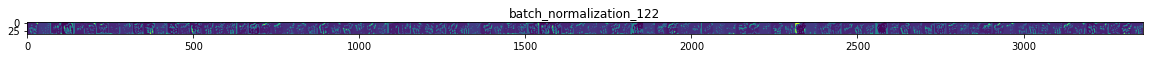

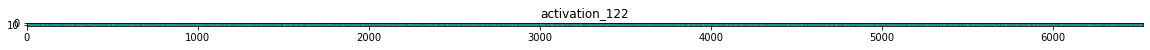

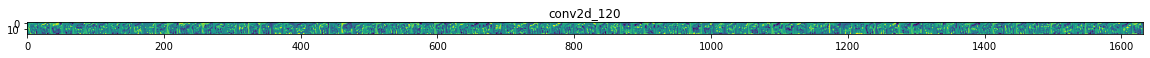

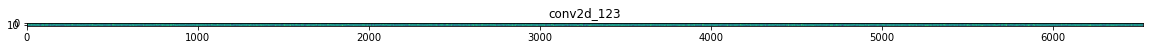

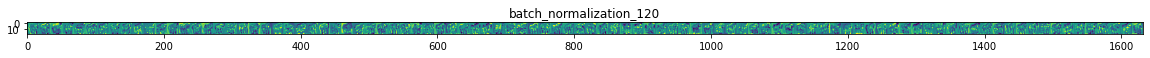

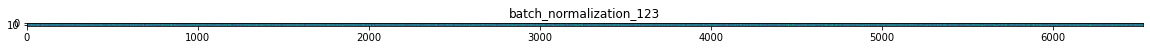

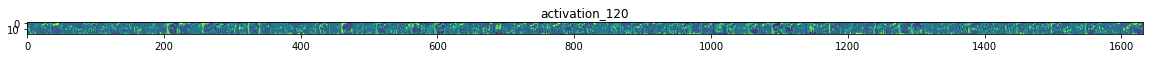

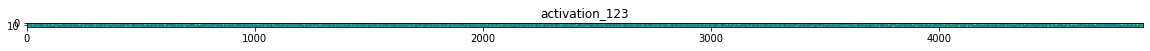

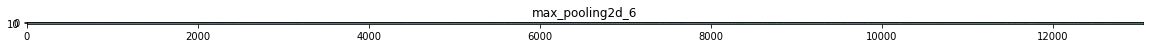

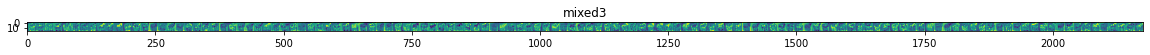

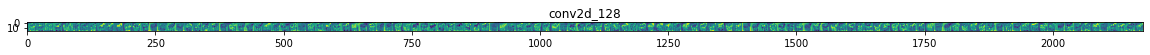

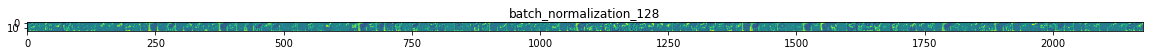

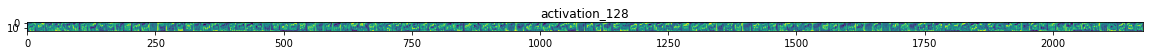

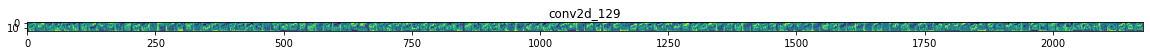

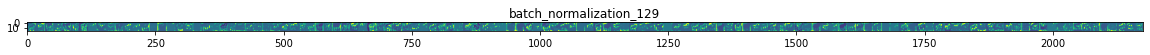

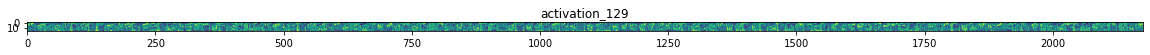

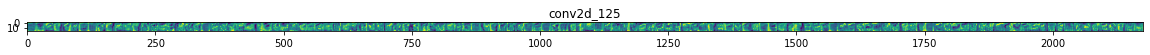

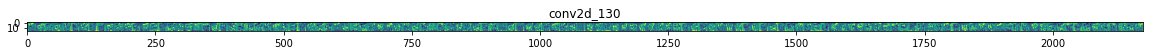

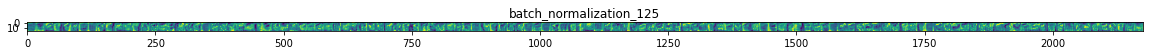

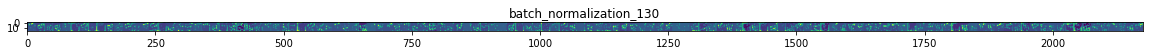

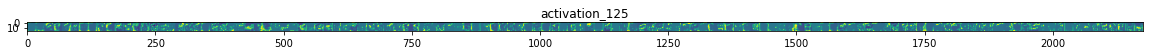

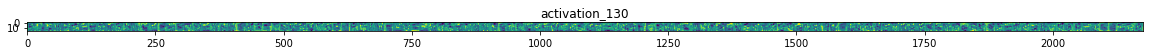

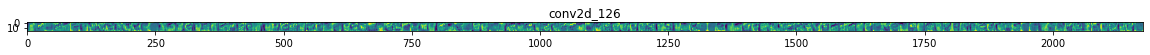

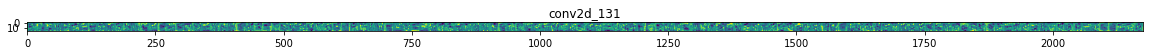

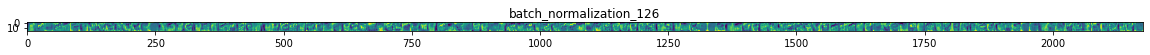

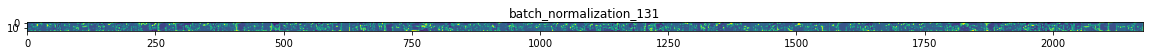

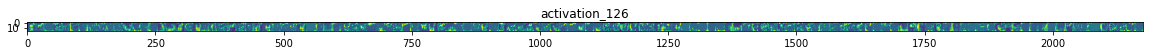

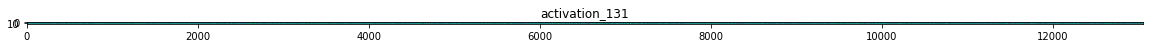

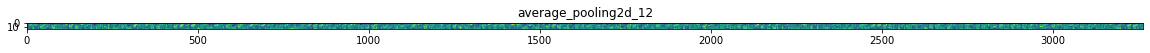

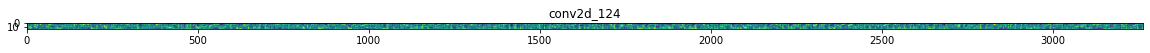

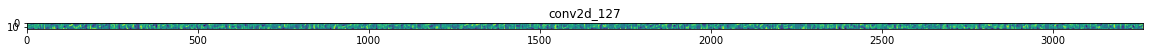

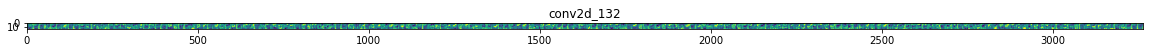

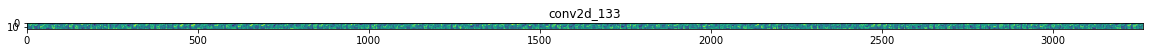

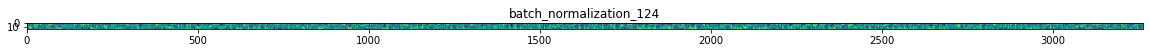

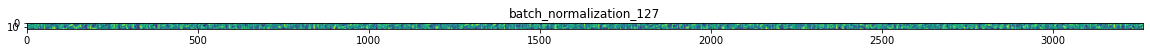

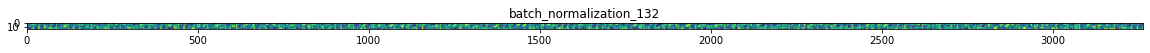

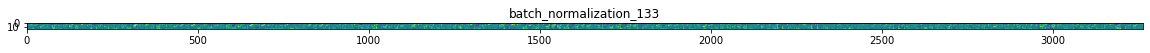

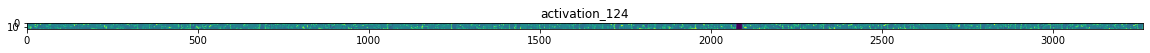

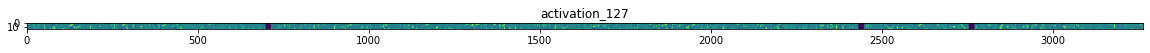

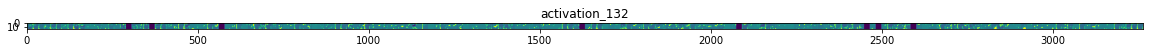

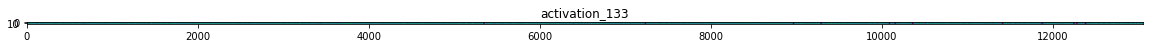

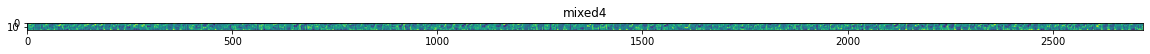

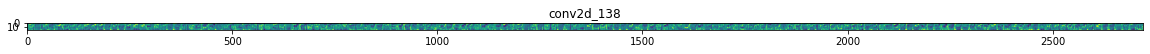

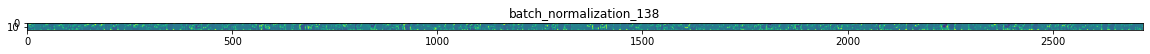

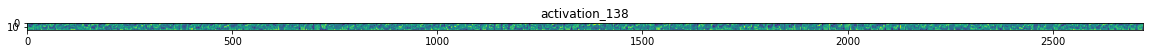

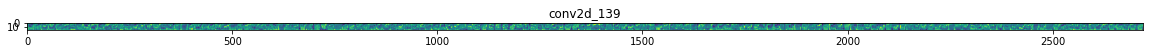

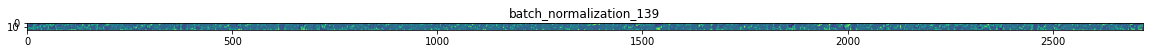

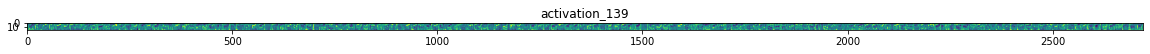

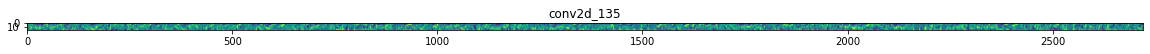

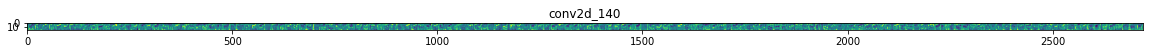

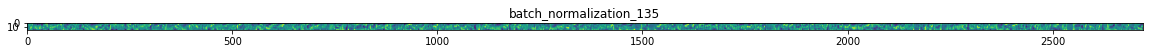

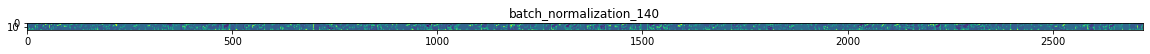

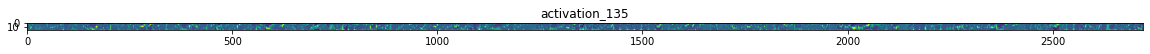

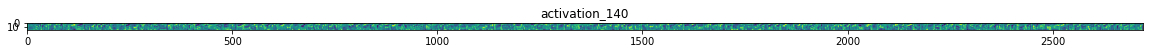

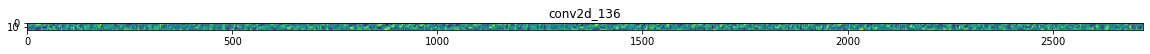

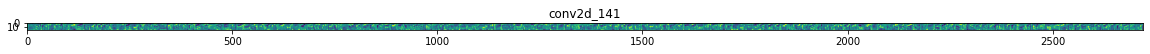

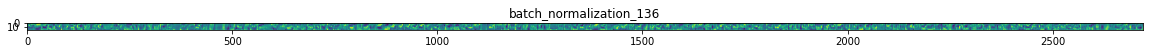

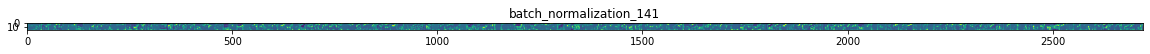

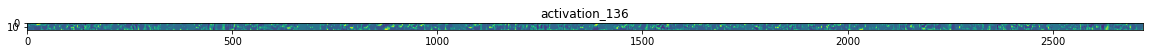

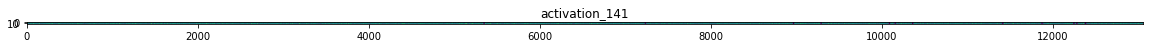

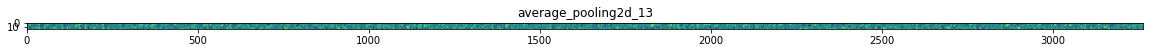

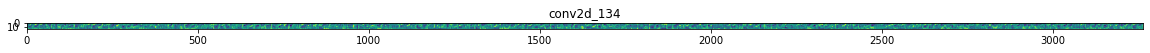

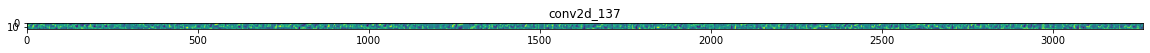

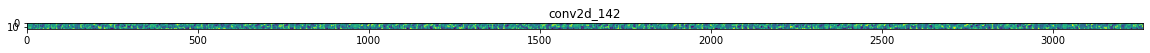

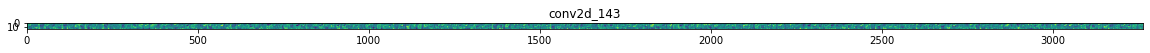

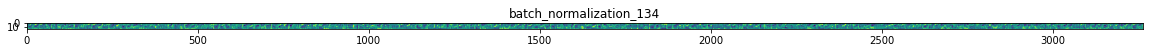

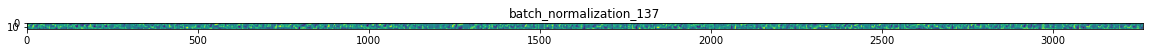

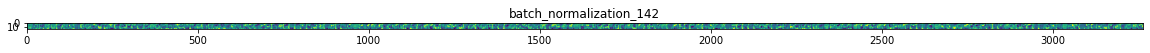

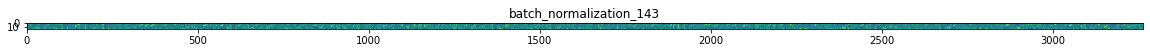

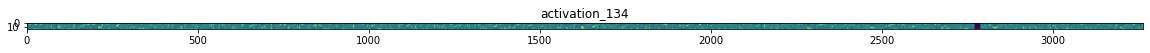

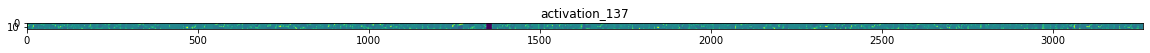

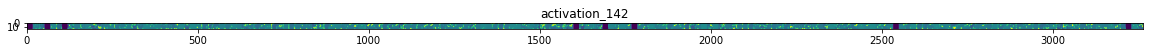

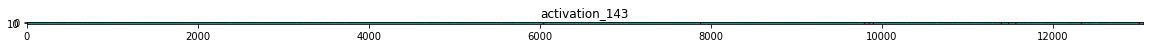

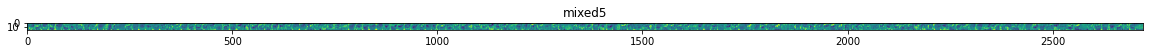

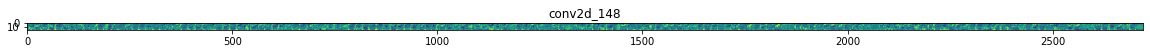

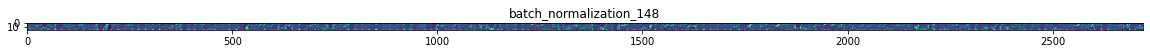

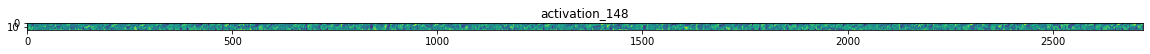

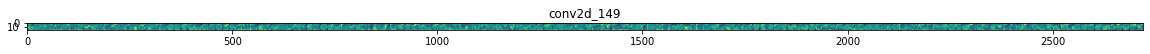

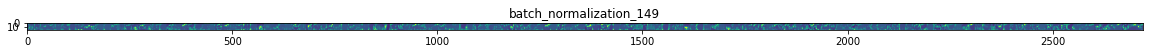

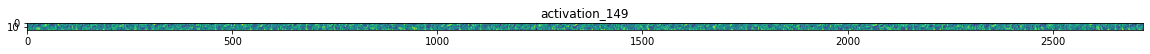

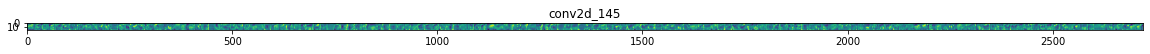

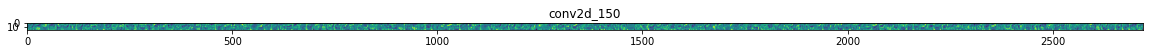

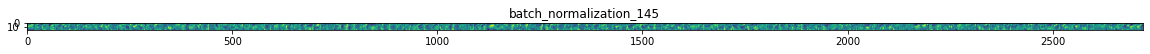

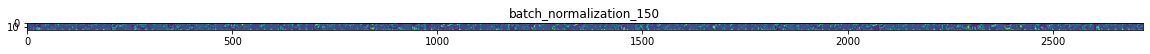

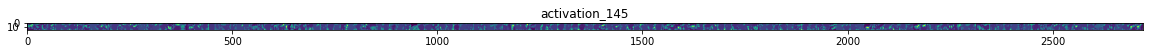

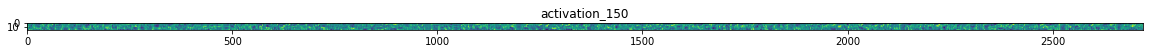

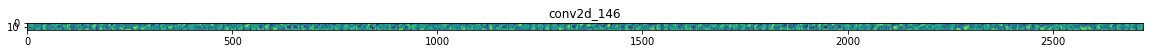

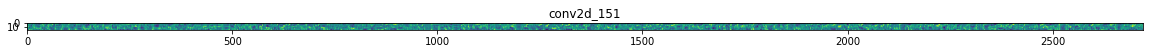

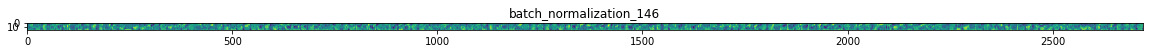

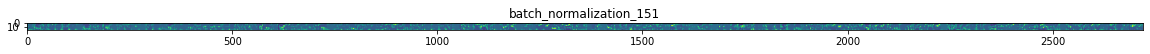

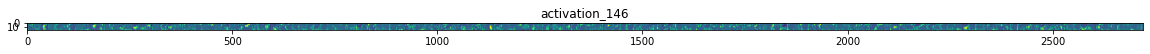

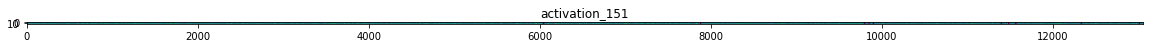

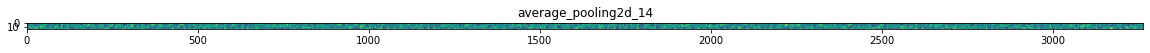

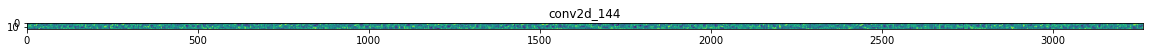

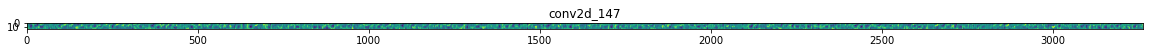

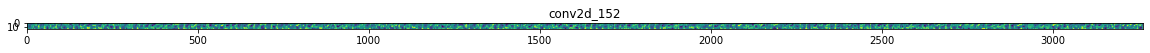

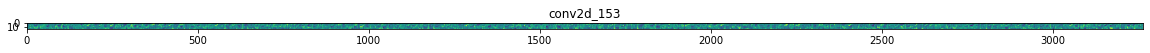

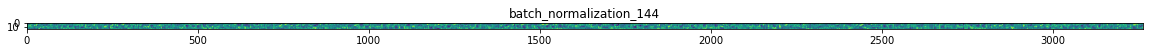

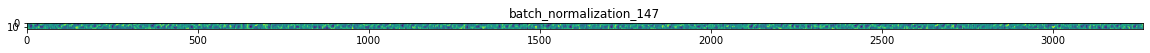

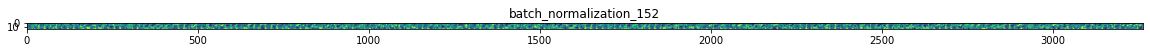

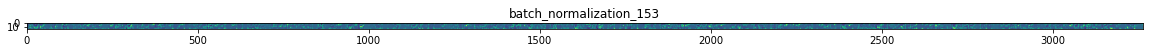

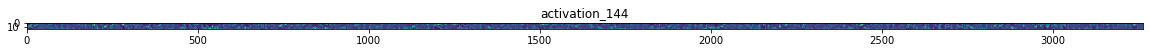

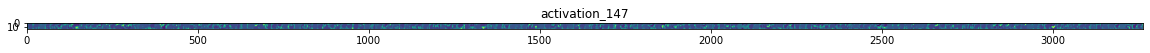

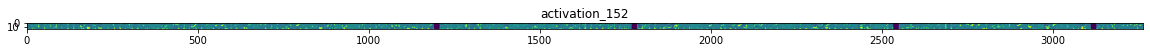

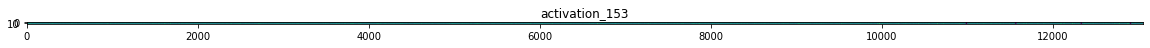

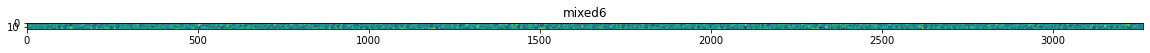

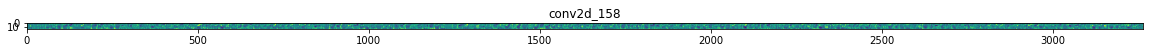

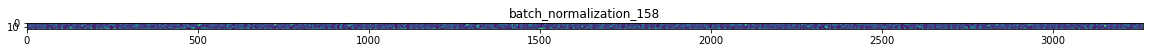

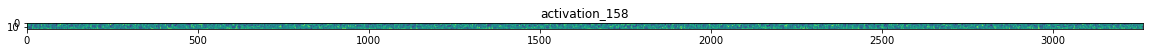

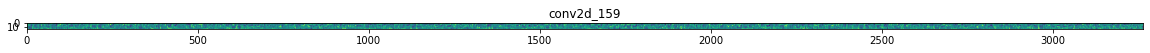

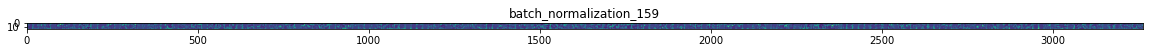

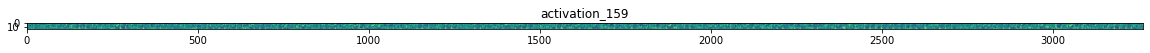

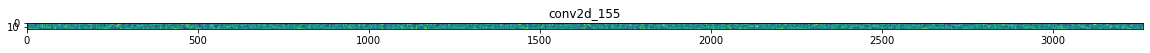

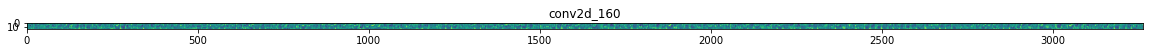

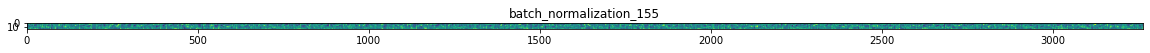

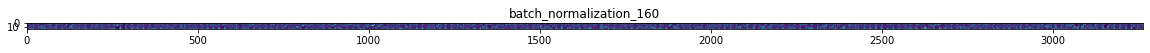

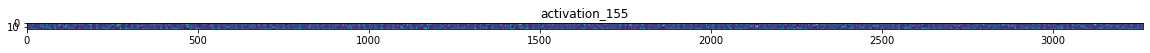

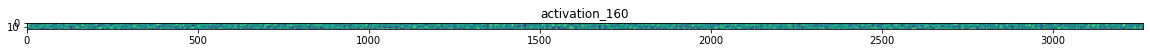

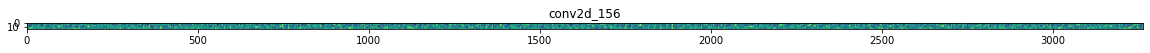

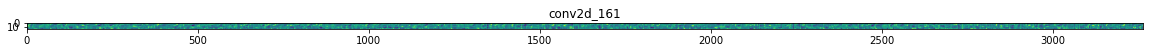

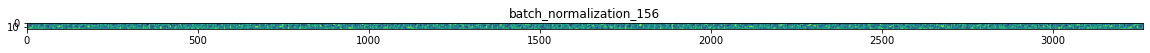

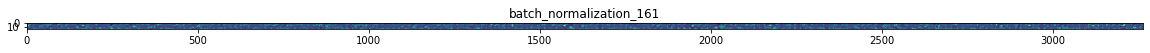

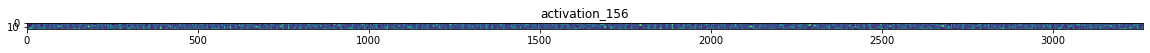

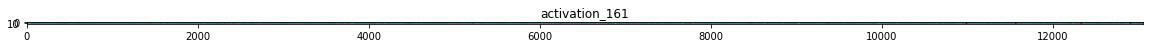

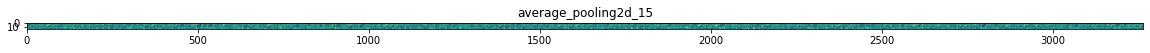

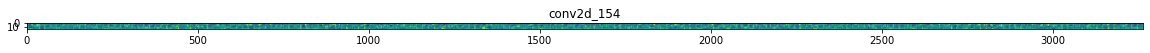

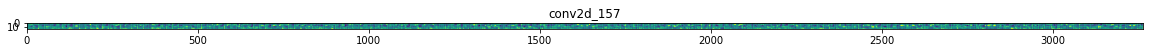

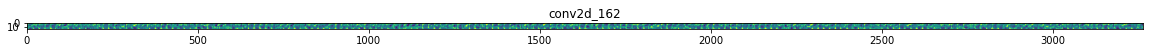

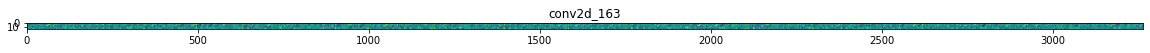

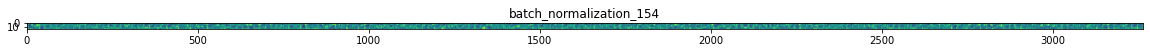

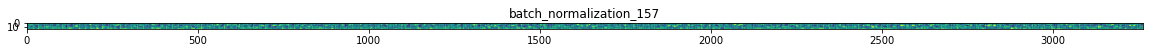

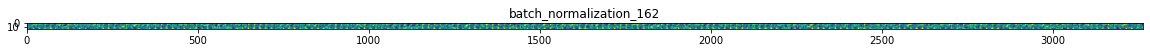

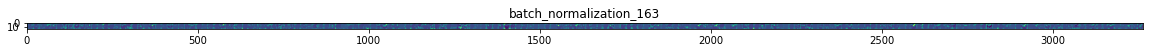

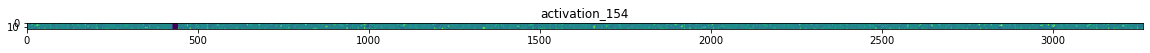

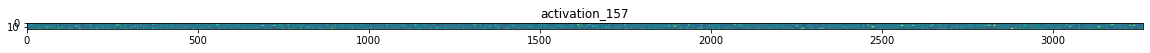

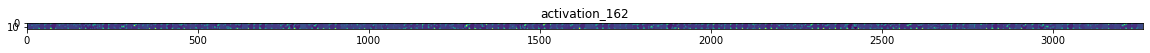

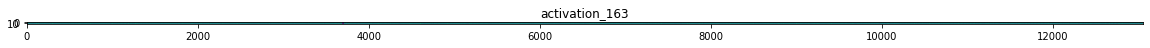

In [25]:
visualize_effect(model, os.path.join(validation_horse_dir,'horse1-000.png'))